<a href="https://colab.research.google.com/github/ingaschoeyen/AINT/blob/main/Copy_of_ai4nt2q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 4 Neurotech Phosphene Vision Lab

In this lab, you will implement a *very basic* phosphene vision simulator and use it to compare different filters to see their effects on phosphene vision. Let's start by importing packages/modules, defining some variables and downloading a streetview image of Nijmegen from Wikipedia to use as a running example.

In [ ]:
from scipy import signal # for 2D convolution

import matplotlib.pyplot as plt # for general plotting
import numpy as np              # for everything else

In [ ]:
electrode_size = 32  # number of electrodes
pixel_size     = 512 # number of pixels
phosphene_size = 3   # standard deviation

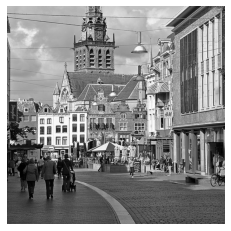

In [ ]:
# wget function not working on Windows? Look here: https://builtvisible.com/download-your-website-with-wget/
def get_example_pixel_image(pixel_size):
    from PIL import Image
    from os import system
    system("wget -O pixel_image.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Nijmegen_Stevenskerk_R10.jpg/559px-Nijmegen_Stevenskerk_R10.jpg")
    pixel_image = Image.open("pixel_image.jpg")
    pixel_image = np.array(pixel_image.crop((0, pixel_image.height - pixel_image.width, pixel_image.width, pixel_image.height)).resize((pixel_size, pixel_size), Image.LANCZOS).convert("L"))
    _ = plt.imshow(pixel_image, cmap="gray")
    _ = plt.axis("off")
    return pixel_image

pixel_image = get_example_pixel_image(pixel_size)

We want to implement a phosphene vision simulator, which is basically a function that gets a (preprocessed) pixel image as input and gives a phosphene image as output:

    def simulate_phosphene_vision(pixel_image):
        # phosphene_image = [convert pixel image to phosphene image]
        return phosphene_image

The [convert pixel image to phosphene image] step actually comprises a number of substeps:

1.   Creating an electrode grid
2.   Creating an electrode image
3.   Creating a phosphene filter
4.   Creating a phosphene image

Concretely:

    def simulate_phosphene_vision(pixel_image):
        electrode_grid = create_electrode_grid(electrode_size, pixel_size)
        electrode_image = create_electrode_image(electrode_grid, pixel_size, threshold)
        phosphene_filter = create_phosphene_filter(phosphene_size)
        phosphene_image = create_phosphene_image(electrode_image, phosphene_filter)
        return phosphene_image

Let's have a look at these substeps in more detail.


You are already provided with an implementation of the create_electrode_grid function below. First, study what it does and explain it in one or twosentences. Then, use it to create an electrode grid and plot it.

    def create_electrode_grid(electrode_size, pixel_size):
        electrode_grid = np.zeros((pixel_size, pixel_size), "bool")
        ticks = np.linspace(0, pixel_size - 1, electrode_size).astype("uint16")
        for tick in ticks:
            electrode_grid[tick, ticks] = True
        return electrode_grid

In [ ]:
# Copy and paste code:
def create_electrode_grid(electrode_size, pixel_size):
    electrode_grid = np.zeros((pixel_size, pixel_size), "bool")
    ticks = np.linspace(0, pixel_size - 1, electrode_size).astype("uint16")
    for tick in ticks:
        electrode_grid[tick, ticks] = True
    return electrode_grid

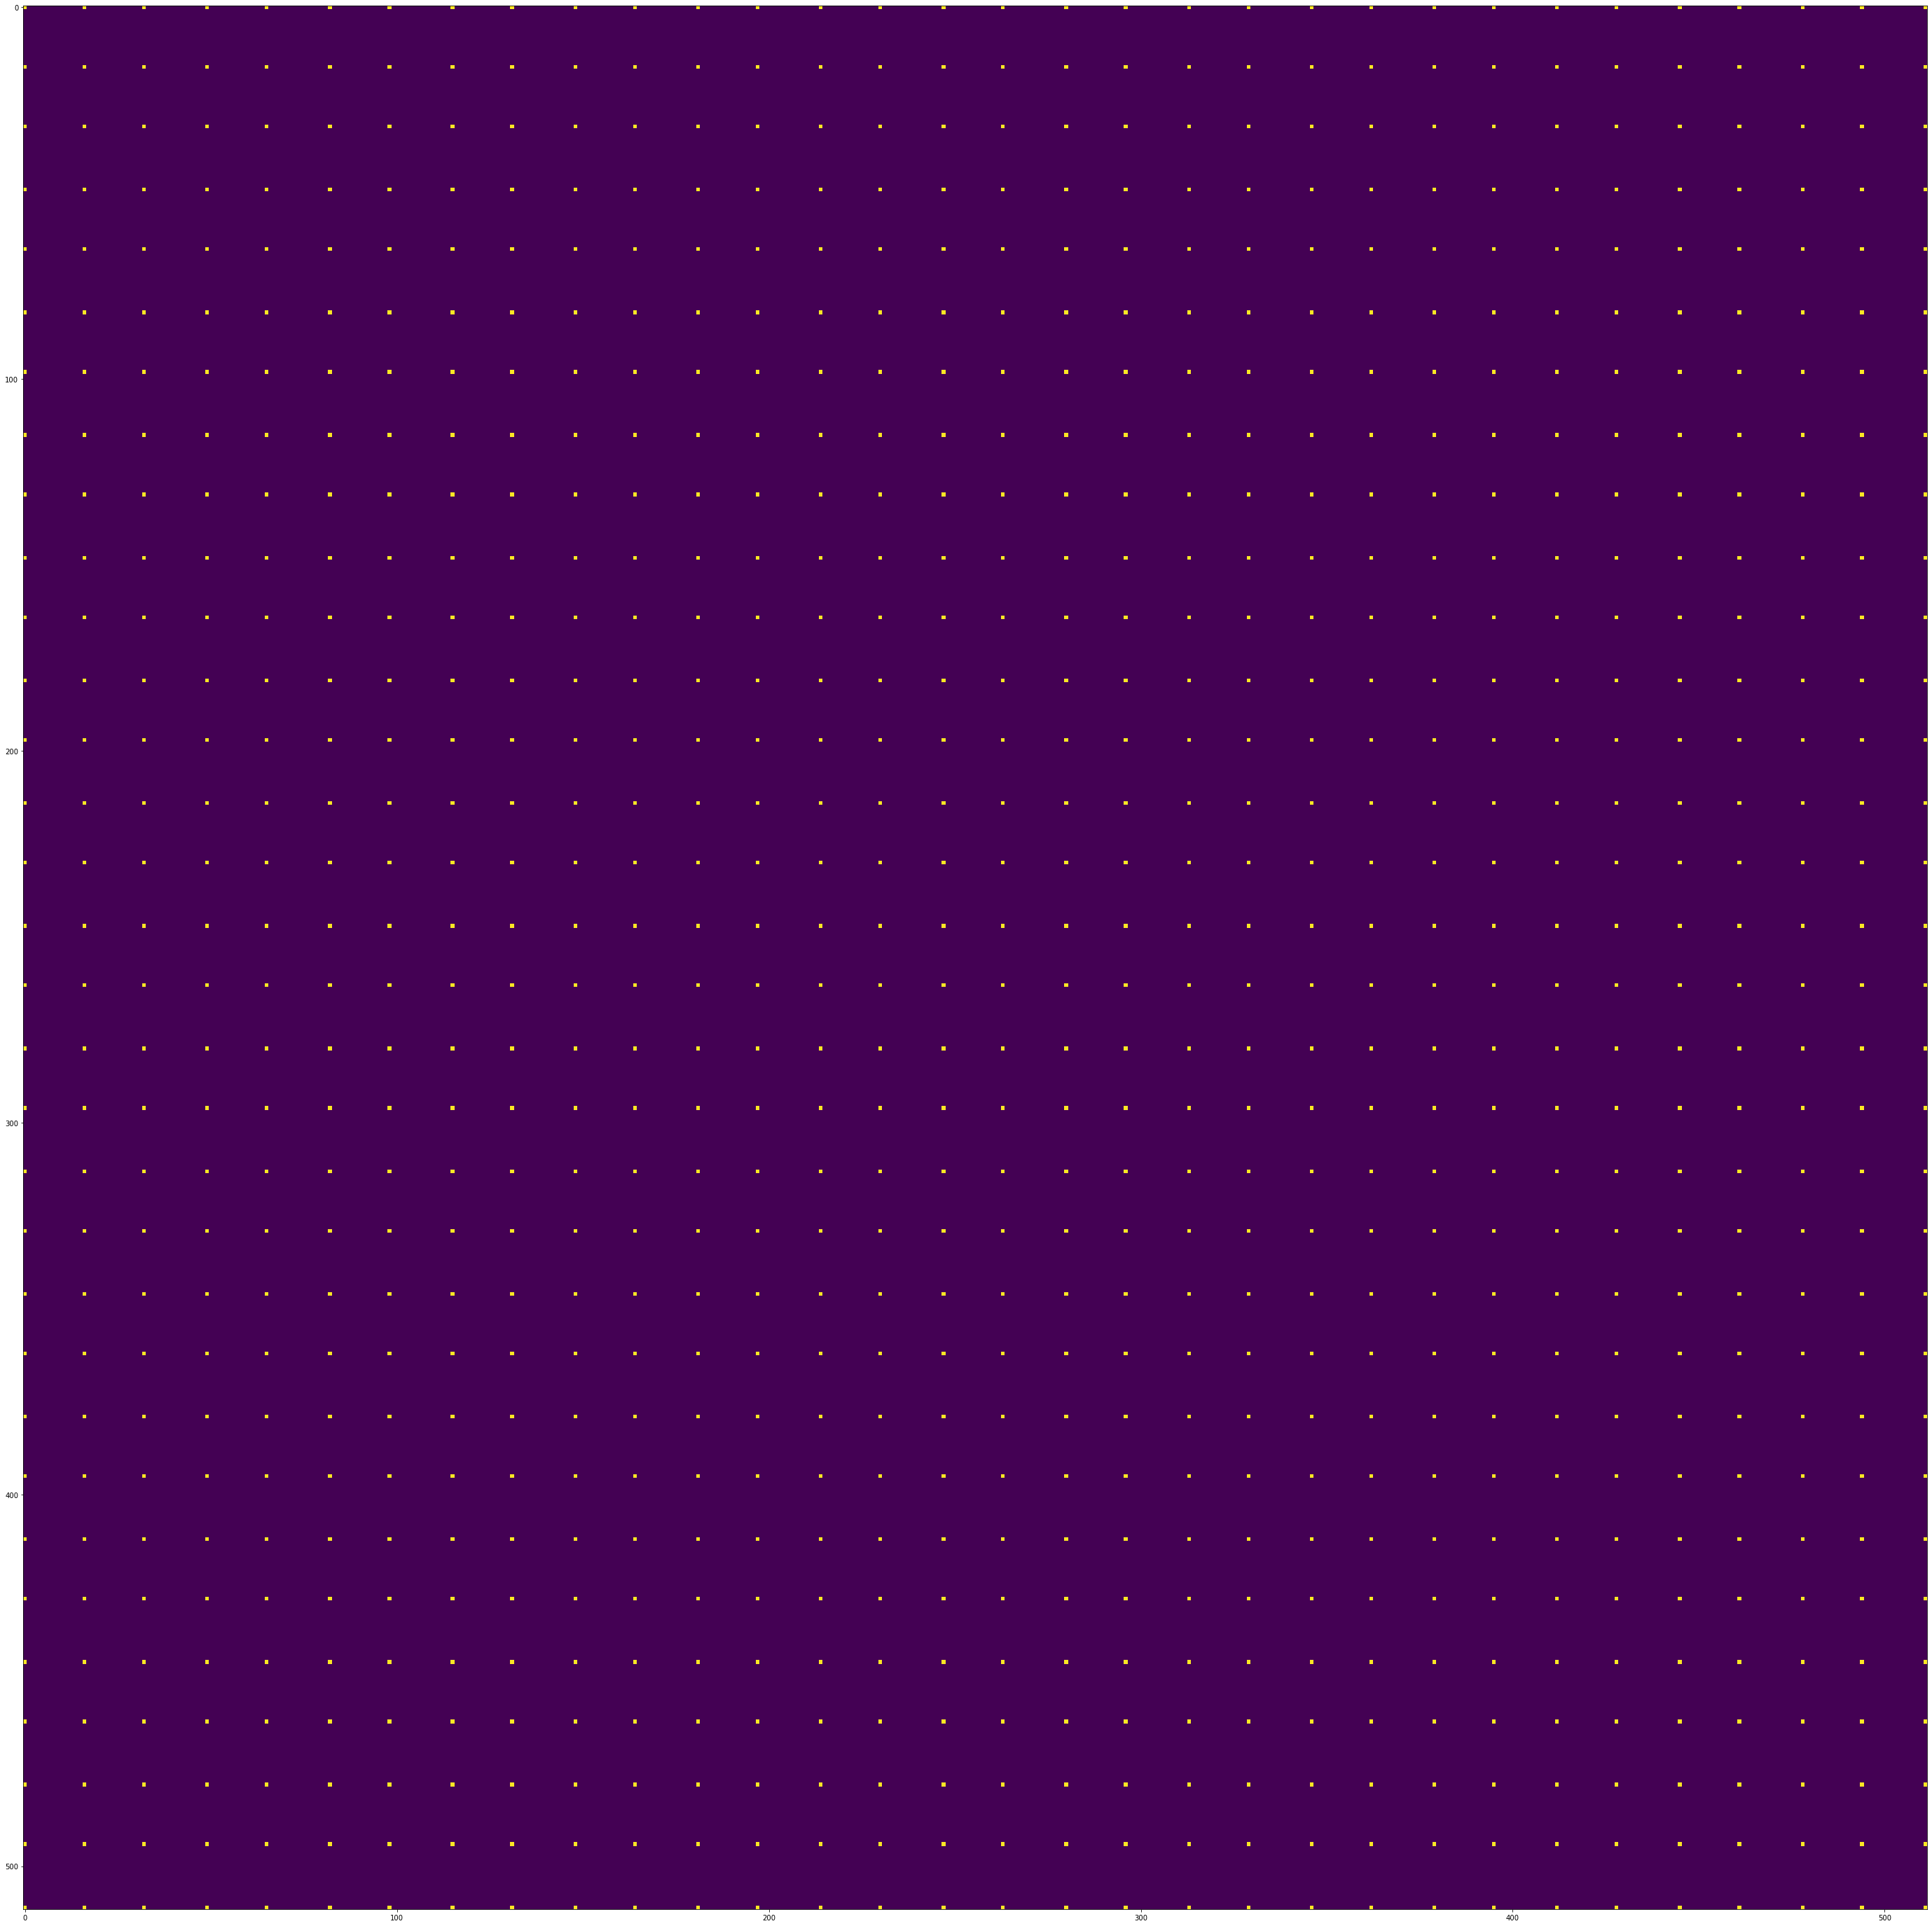

In [ ]:
# Create electrode grid and plot:
grid = create_electrode_grid(electrode_size, pixel_size)
plt.figure(figsize = (50,50))
plt.imshow(grid)

The electrode grid should be multiplied with the pixel image and thresholded to transform continious pixel lumininces to binary electrode activations. Implement the following function and test it with a few different thresholds by plotting the outputs:

    def create_electrode_image(electrode_grid, pixel_image, threshold):
        # electrode_image = ...
        return electrode_image

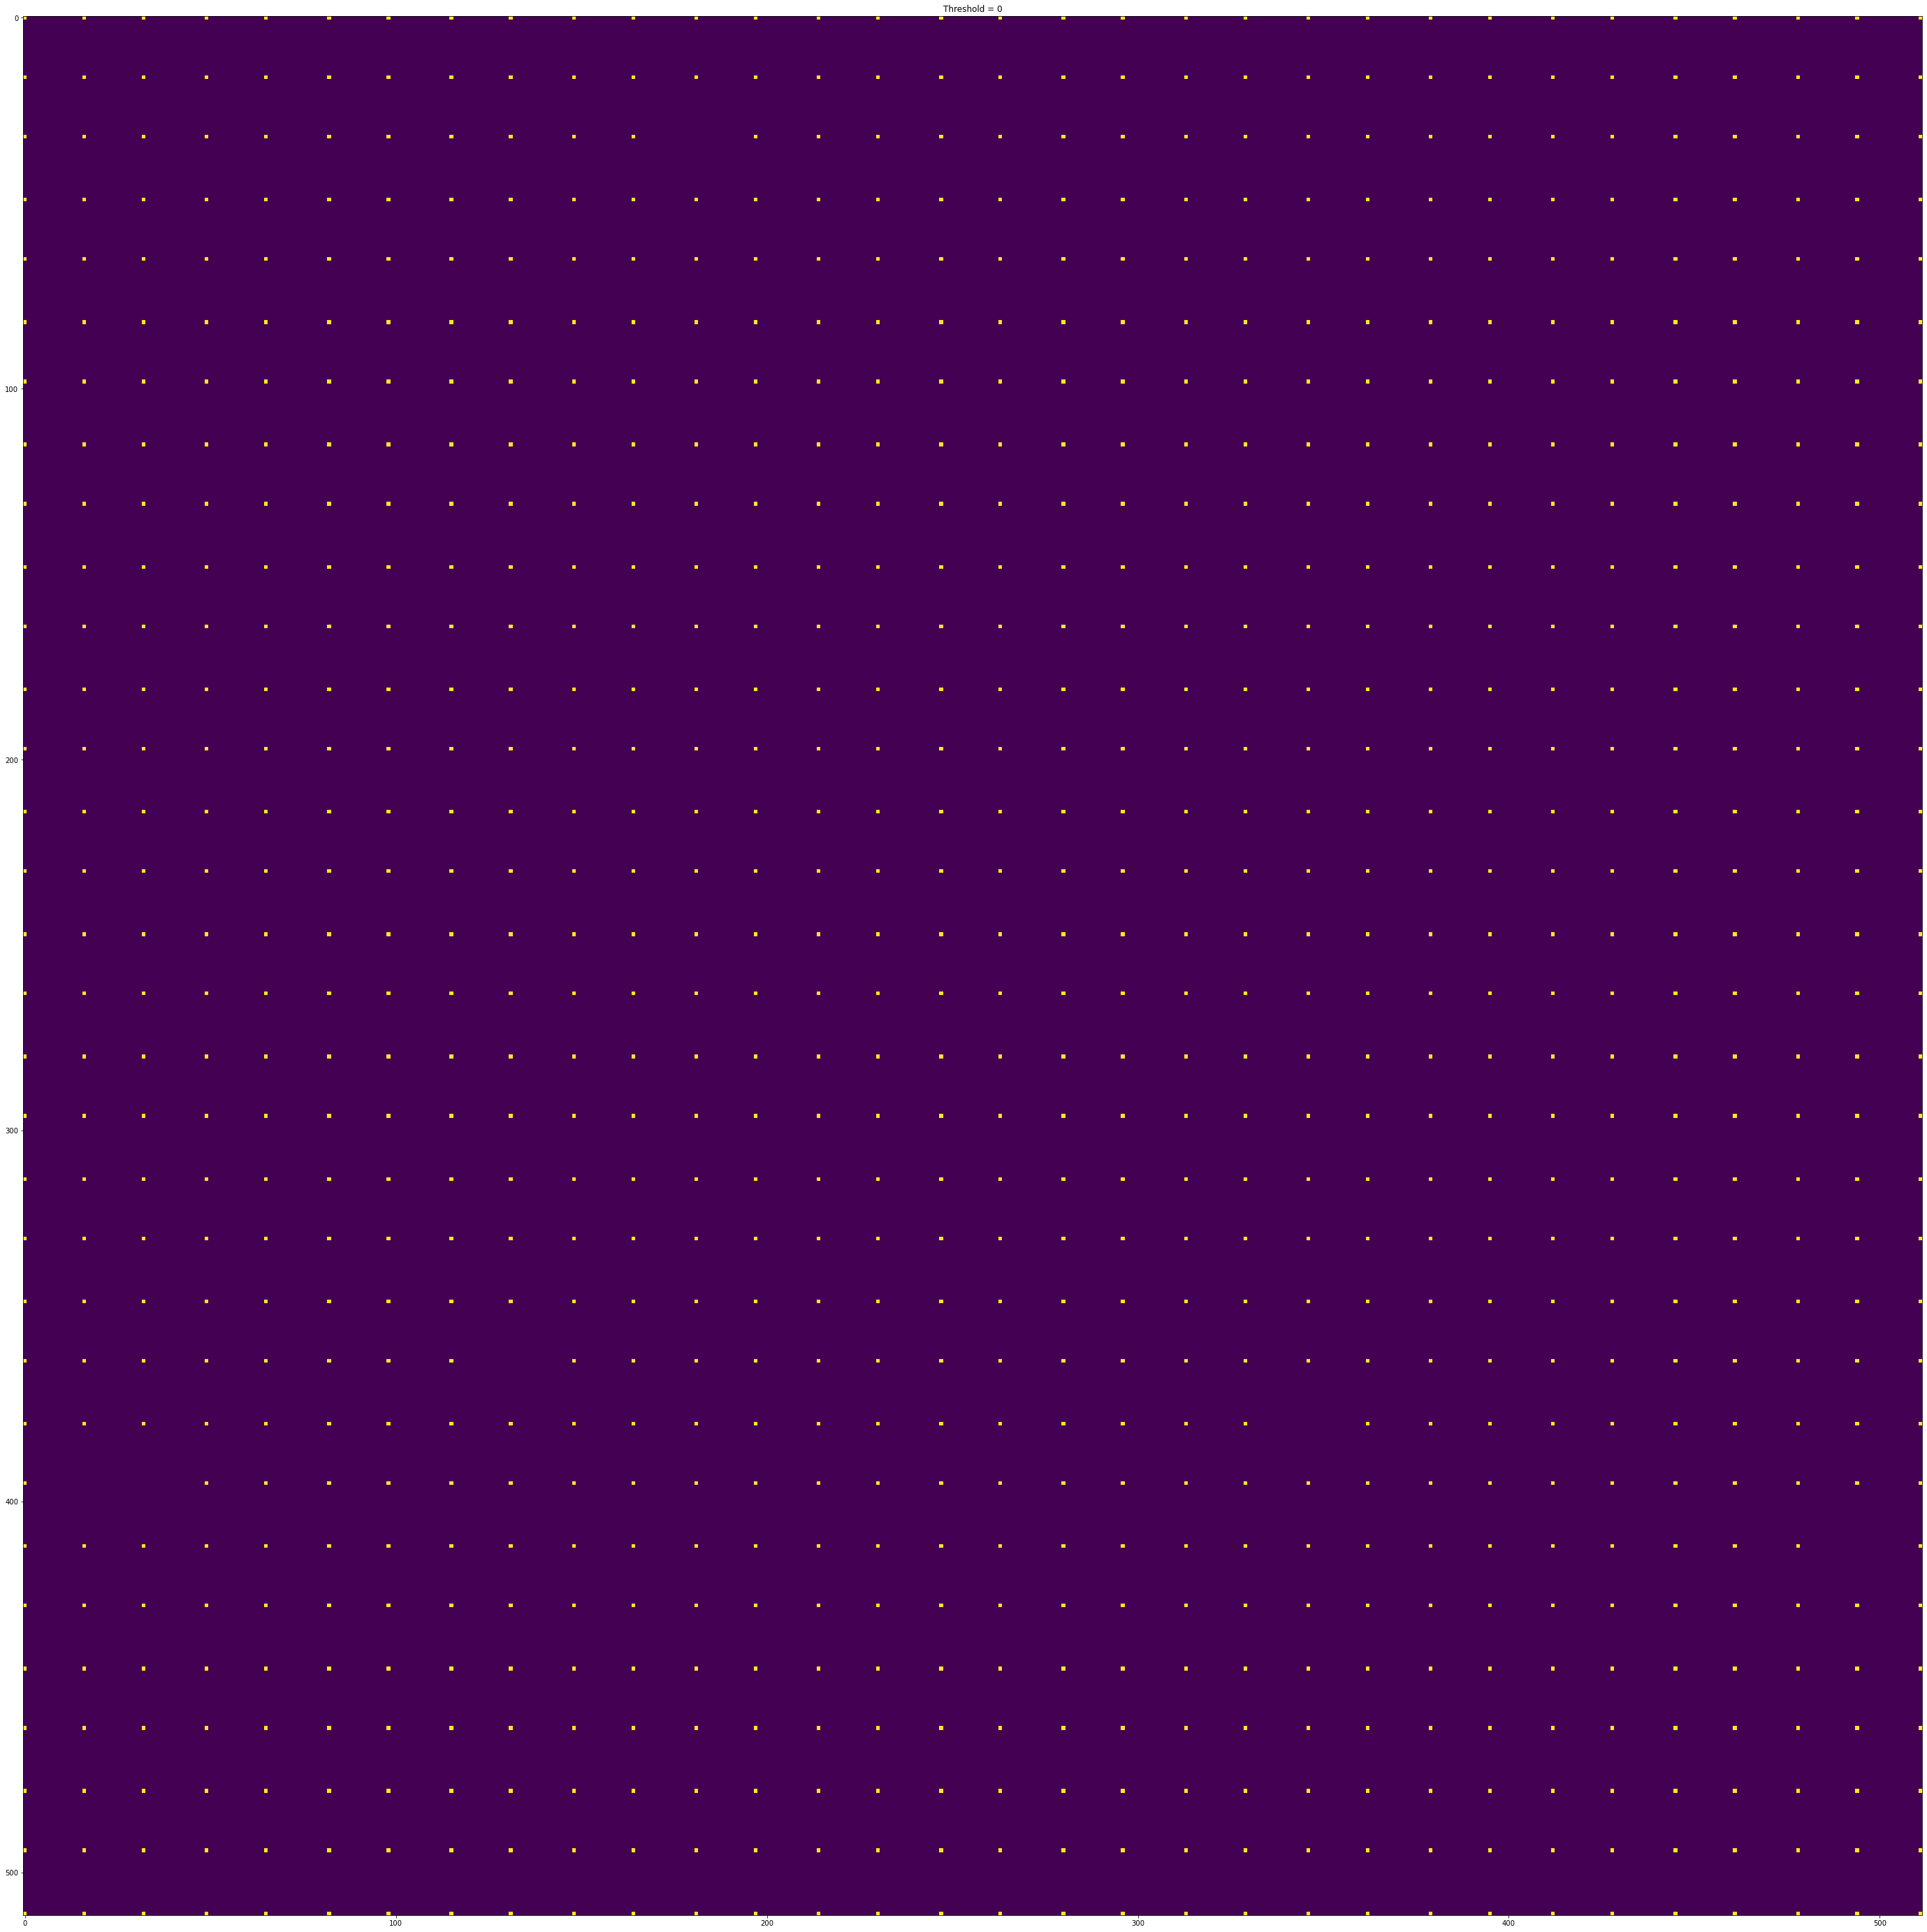

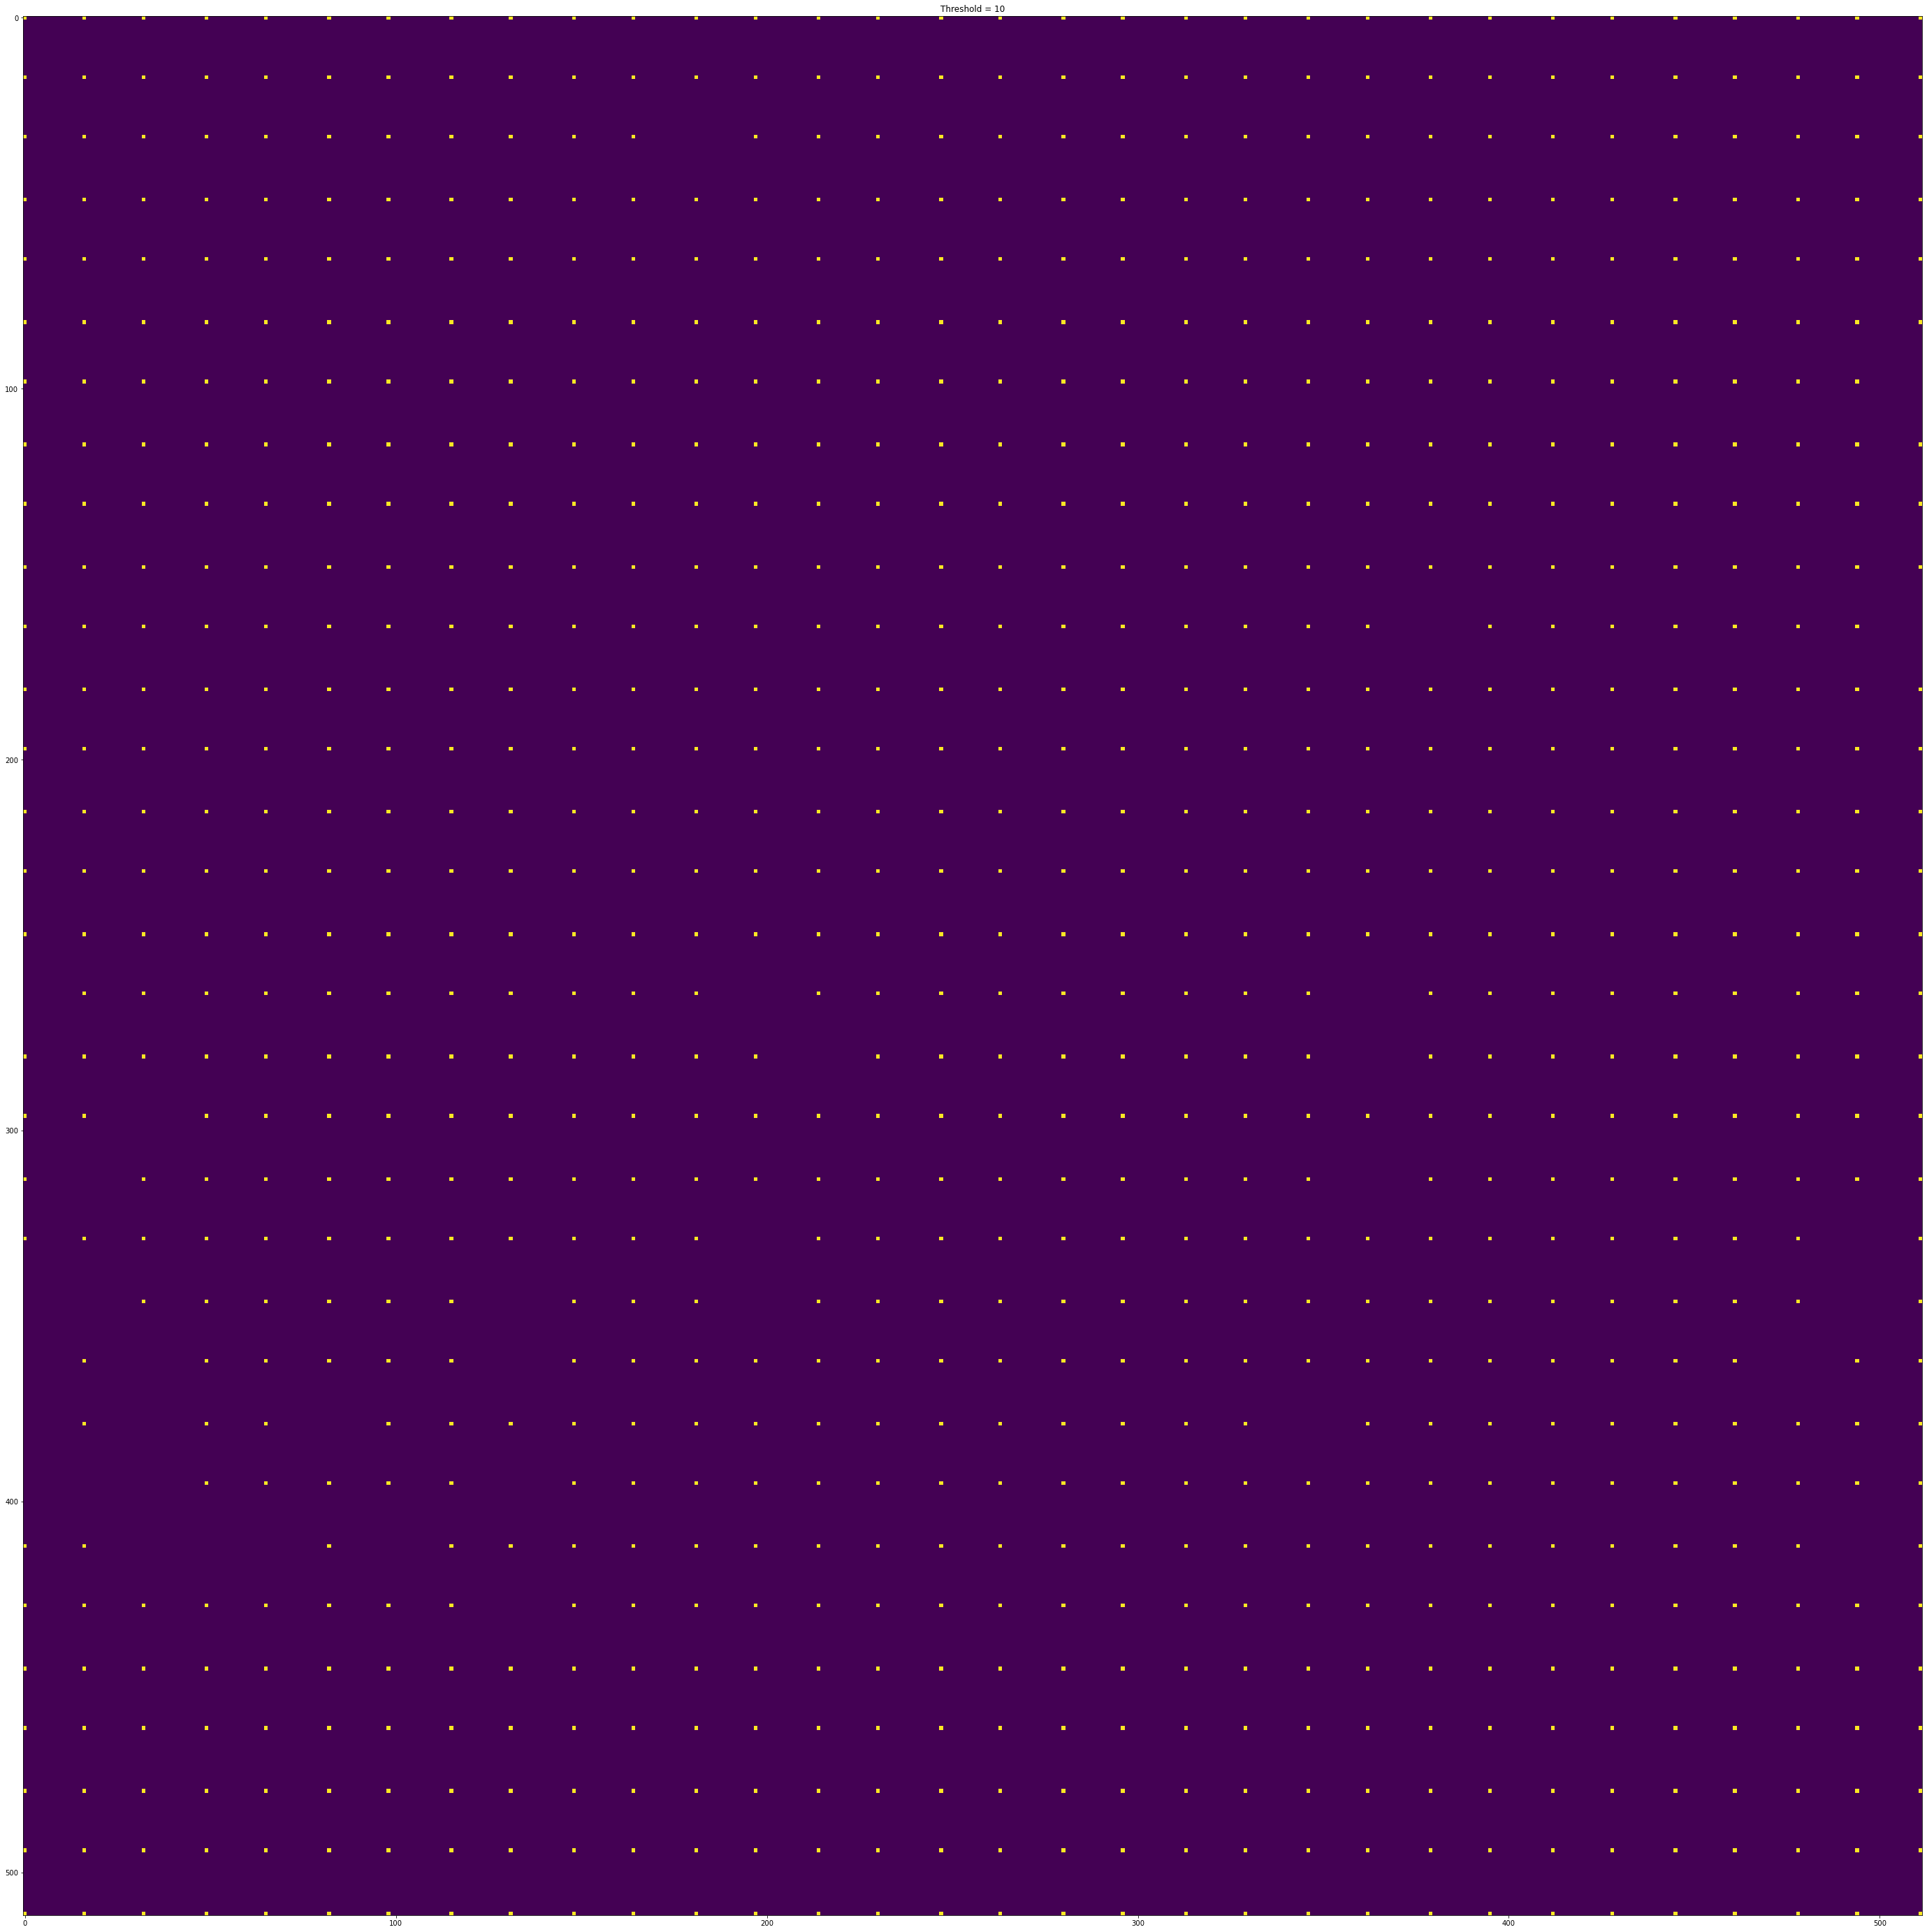

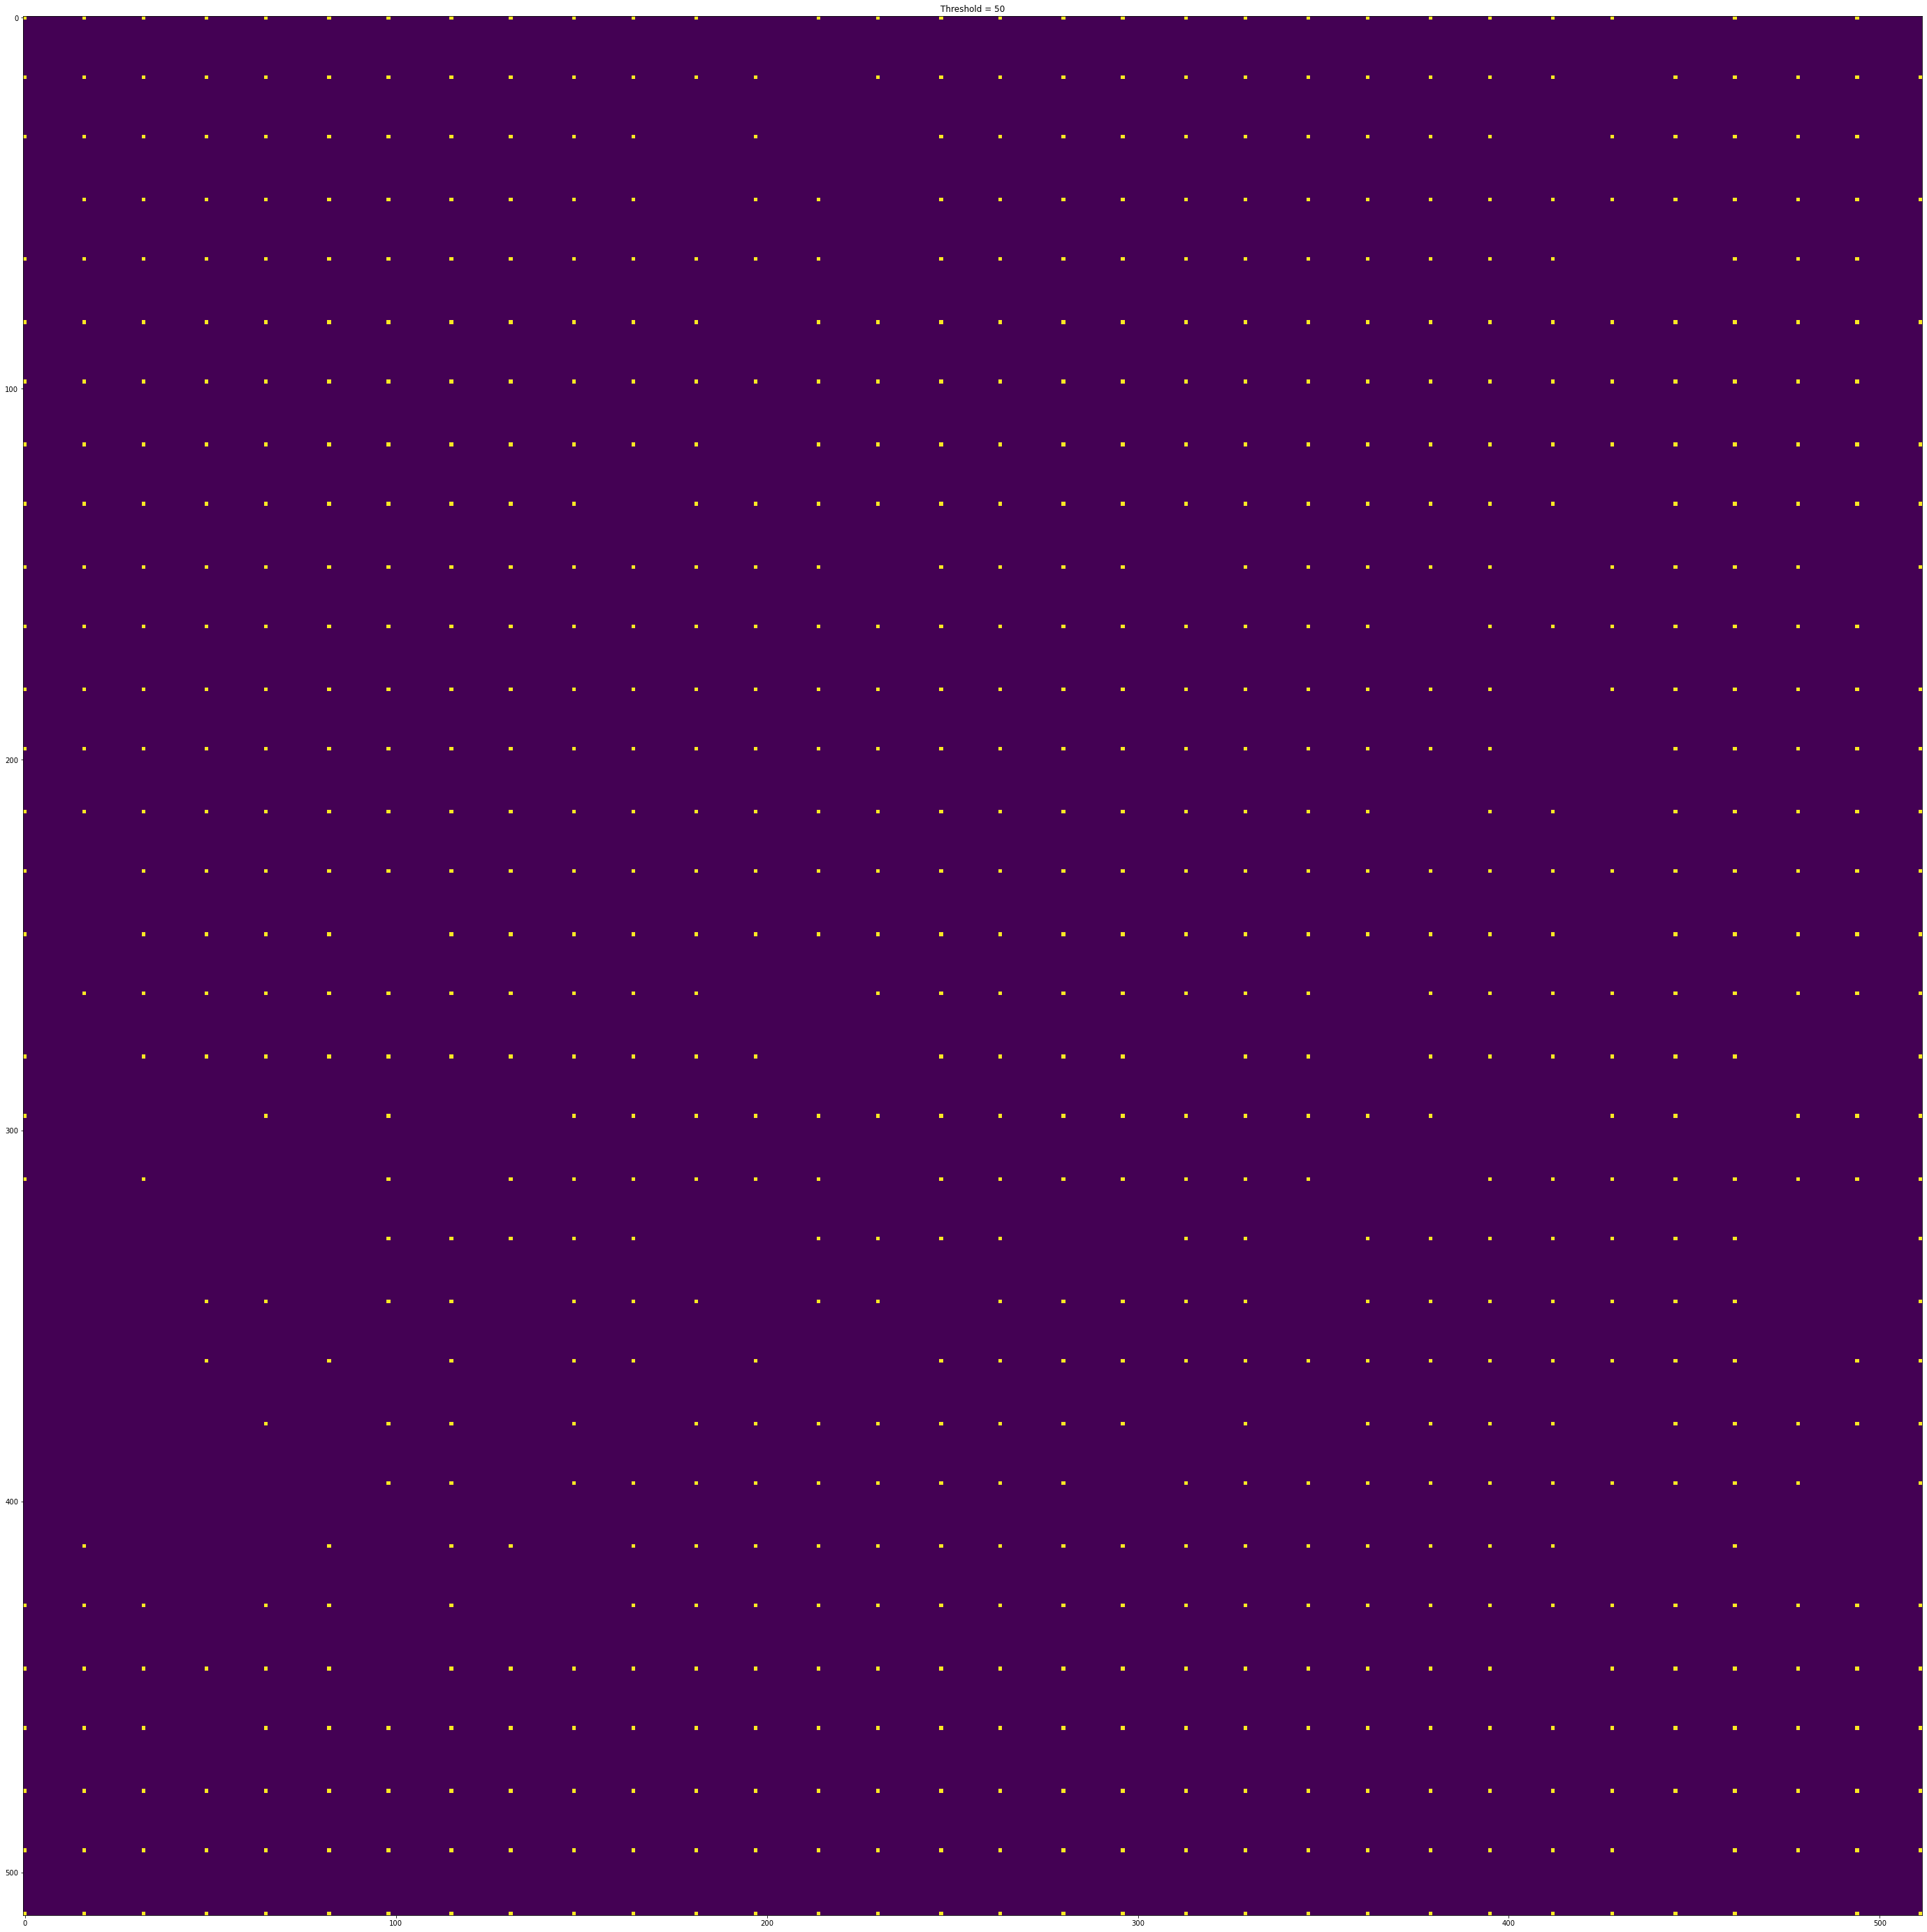

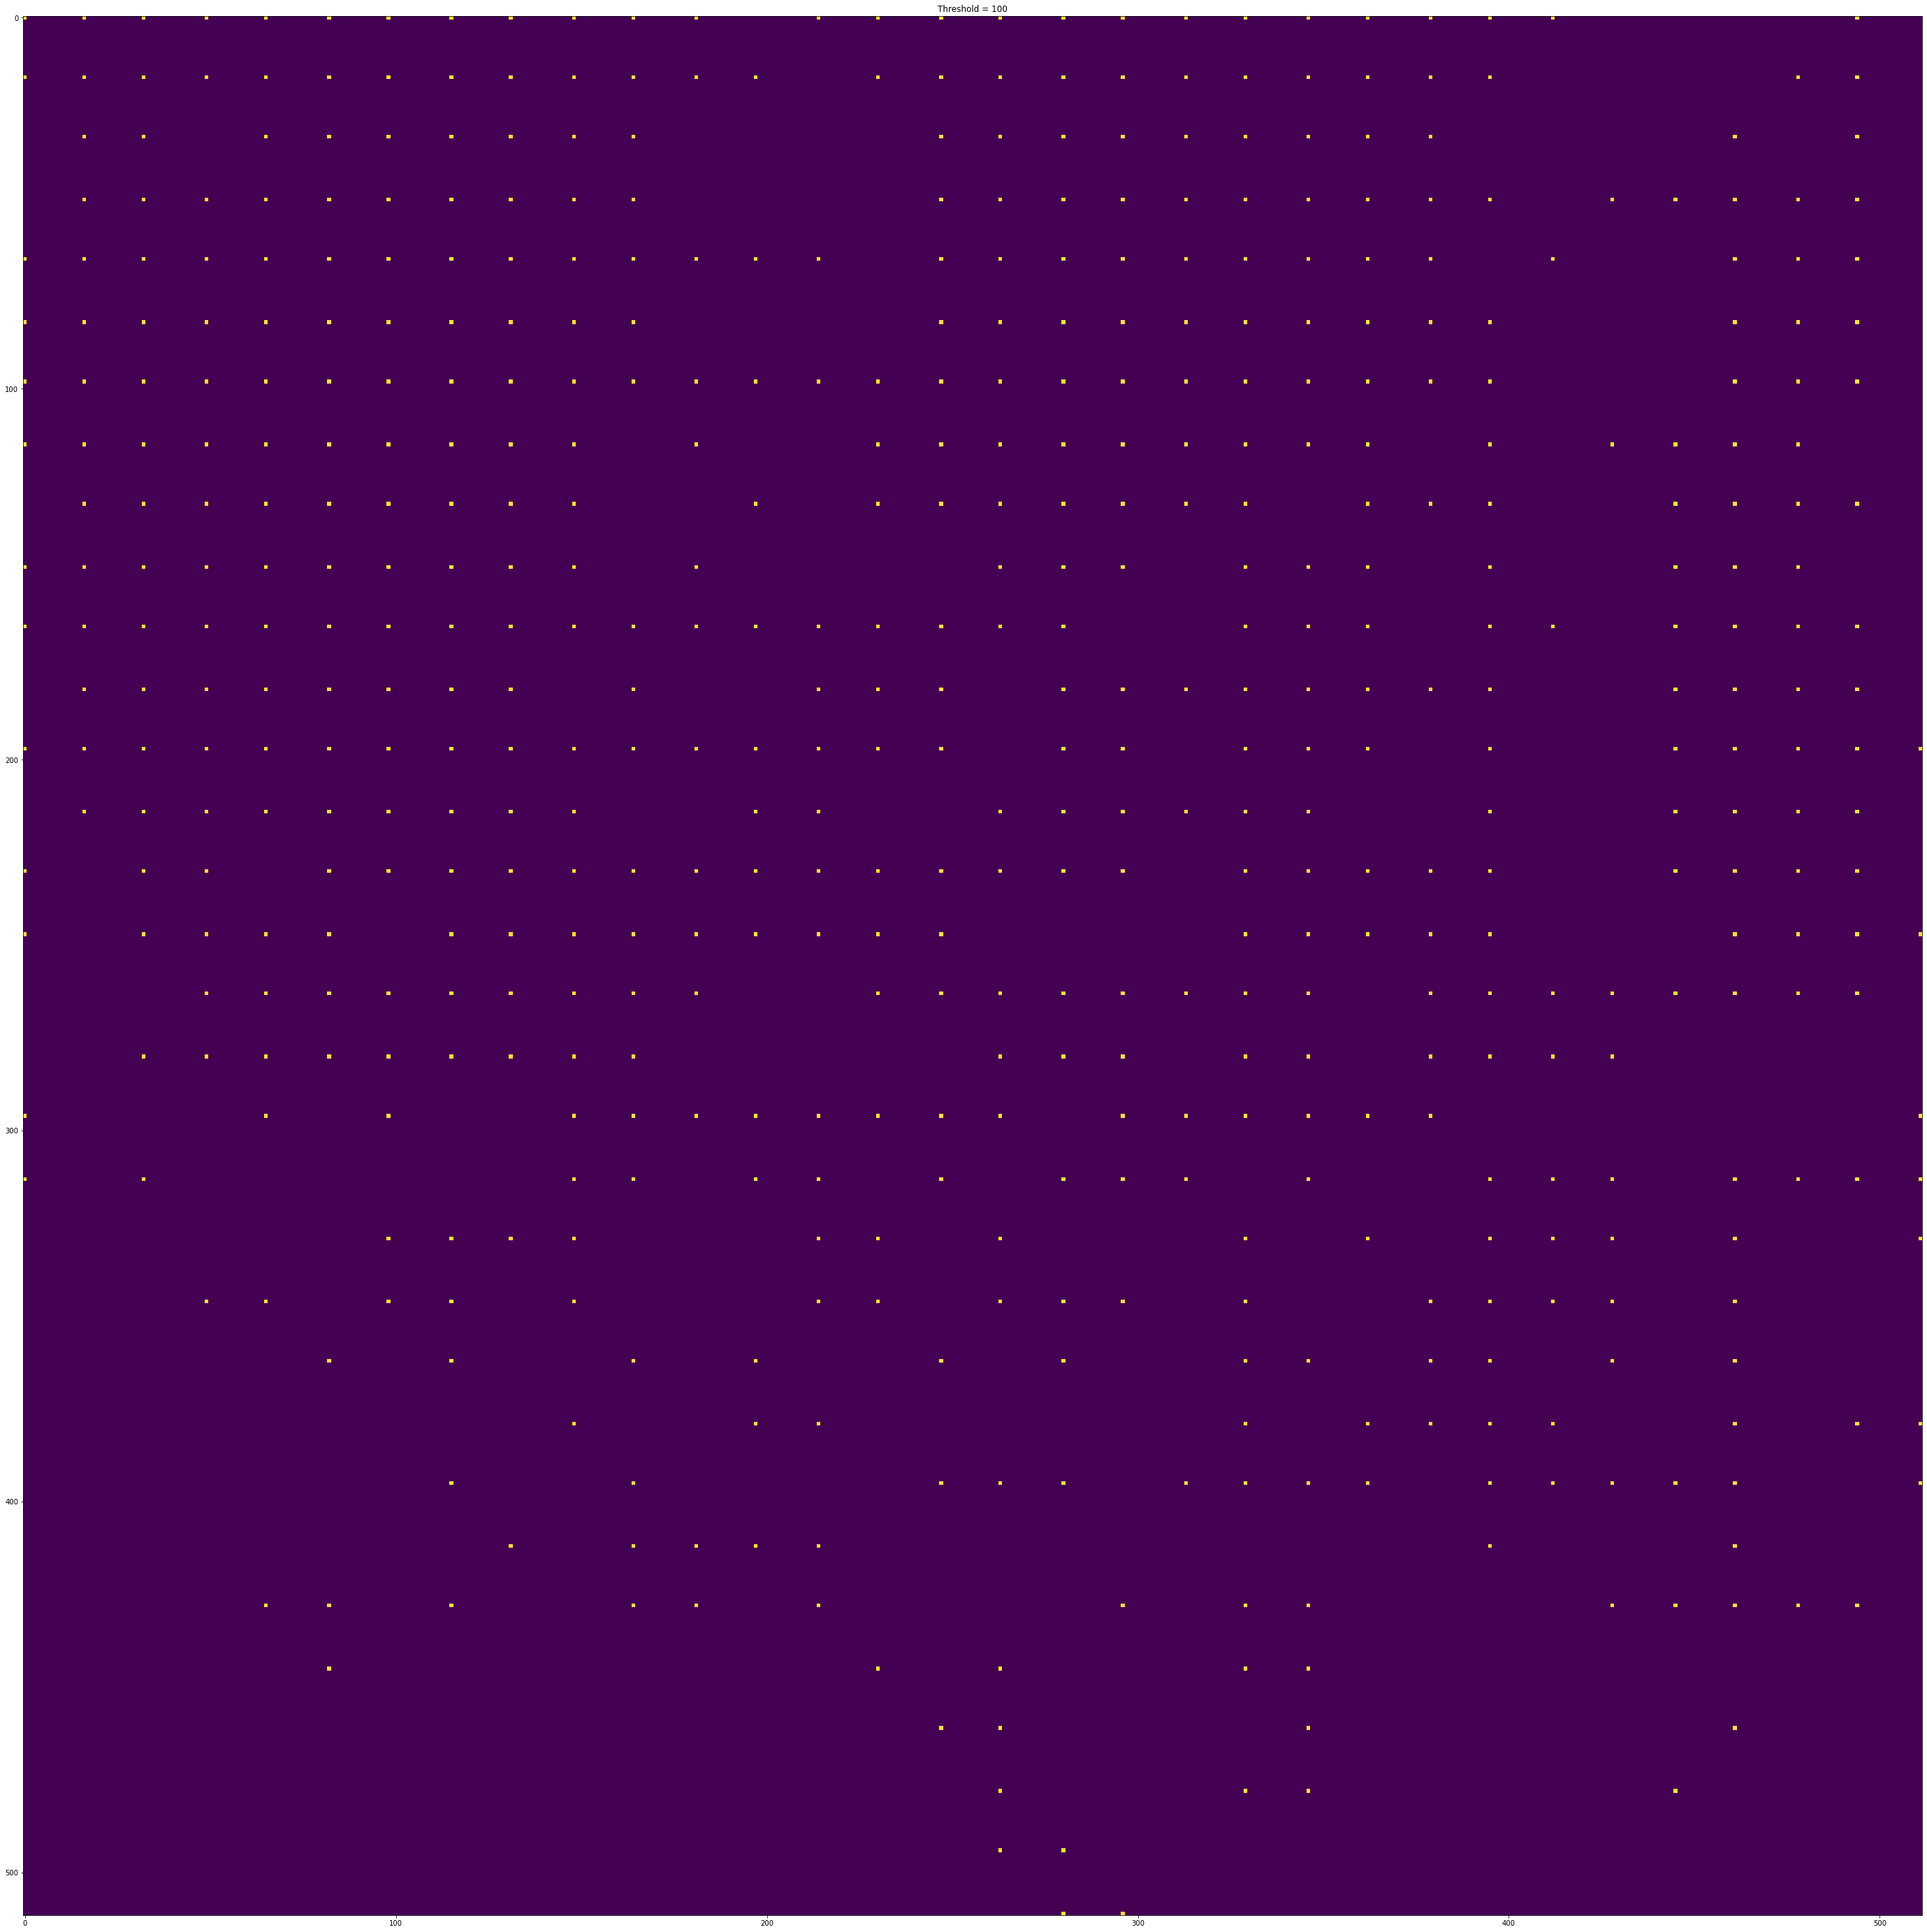

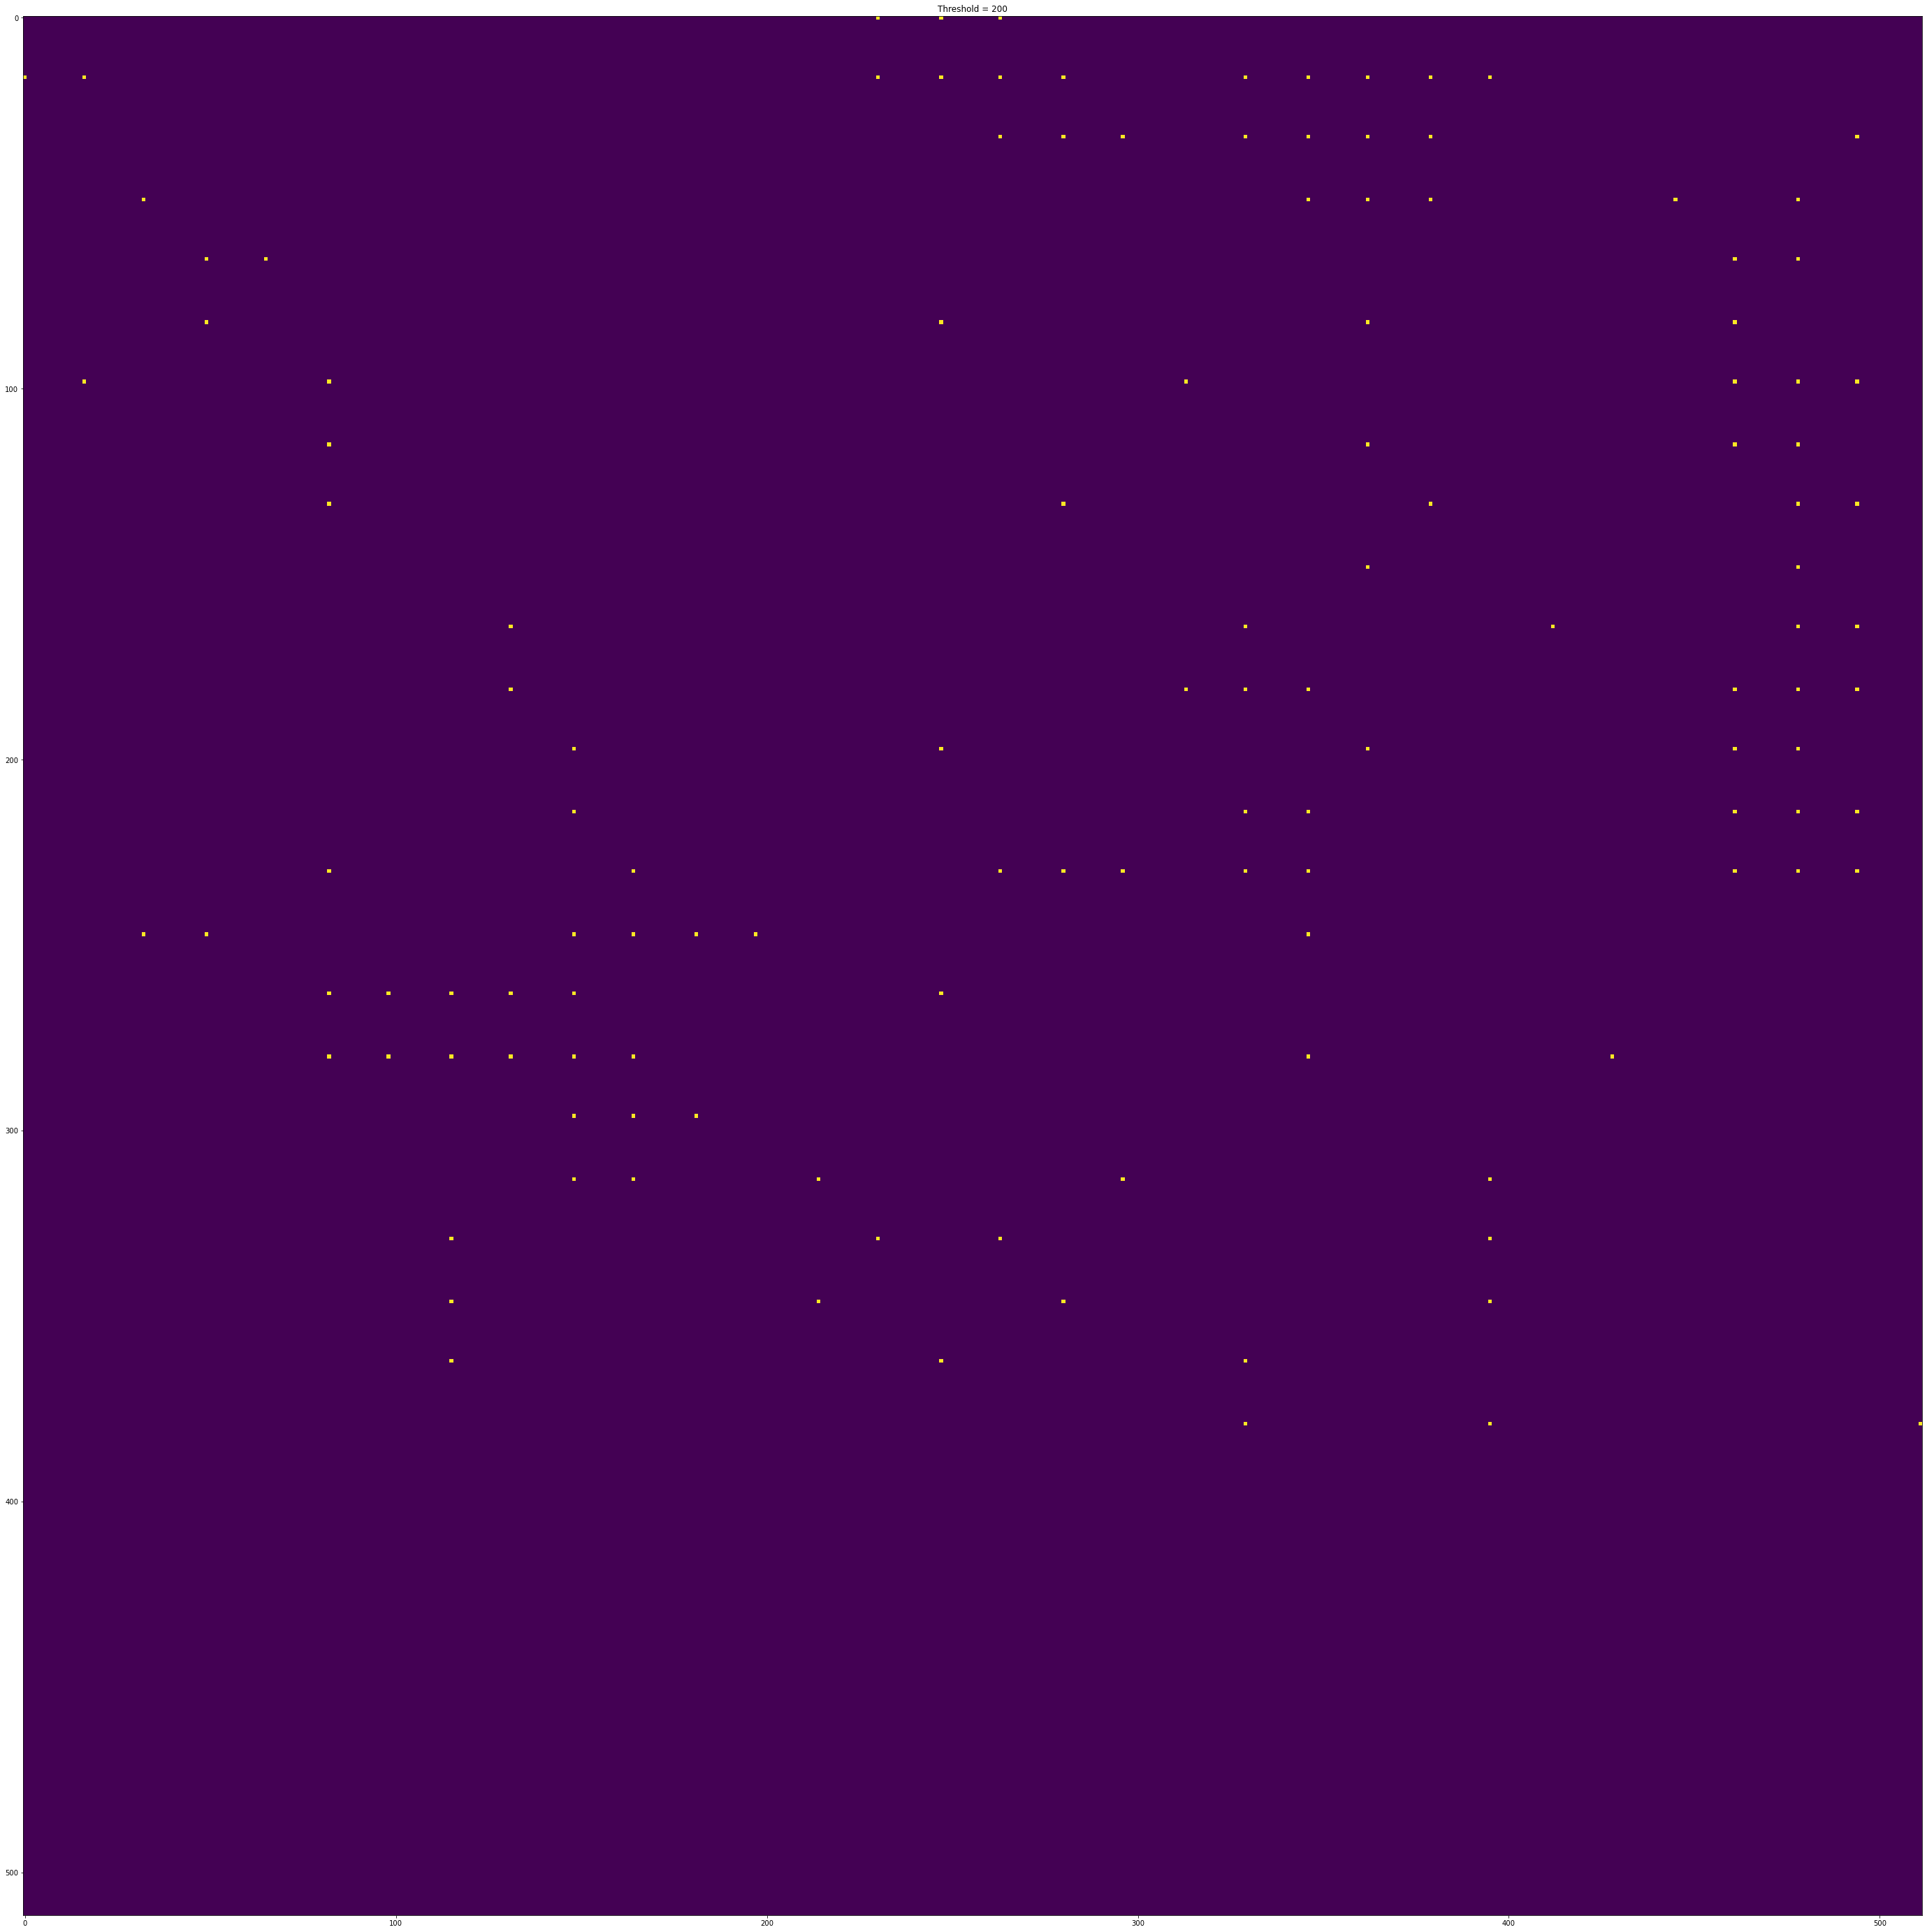

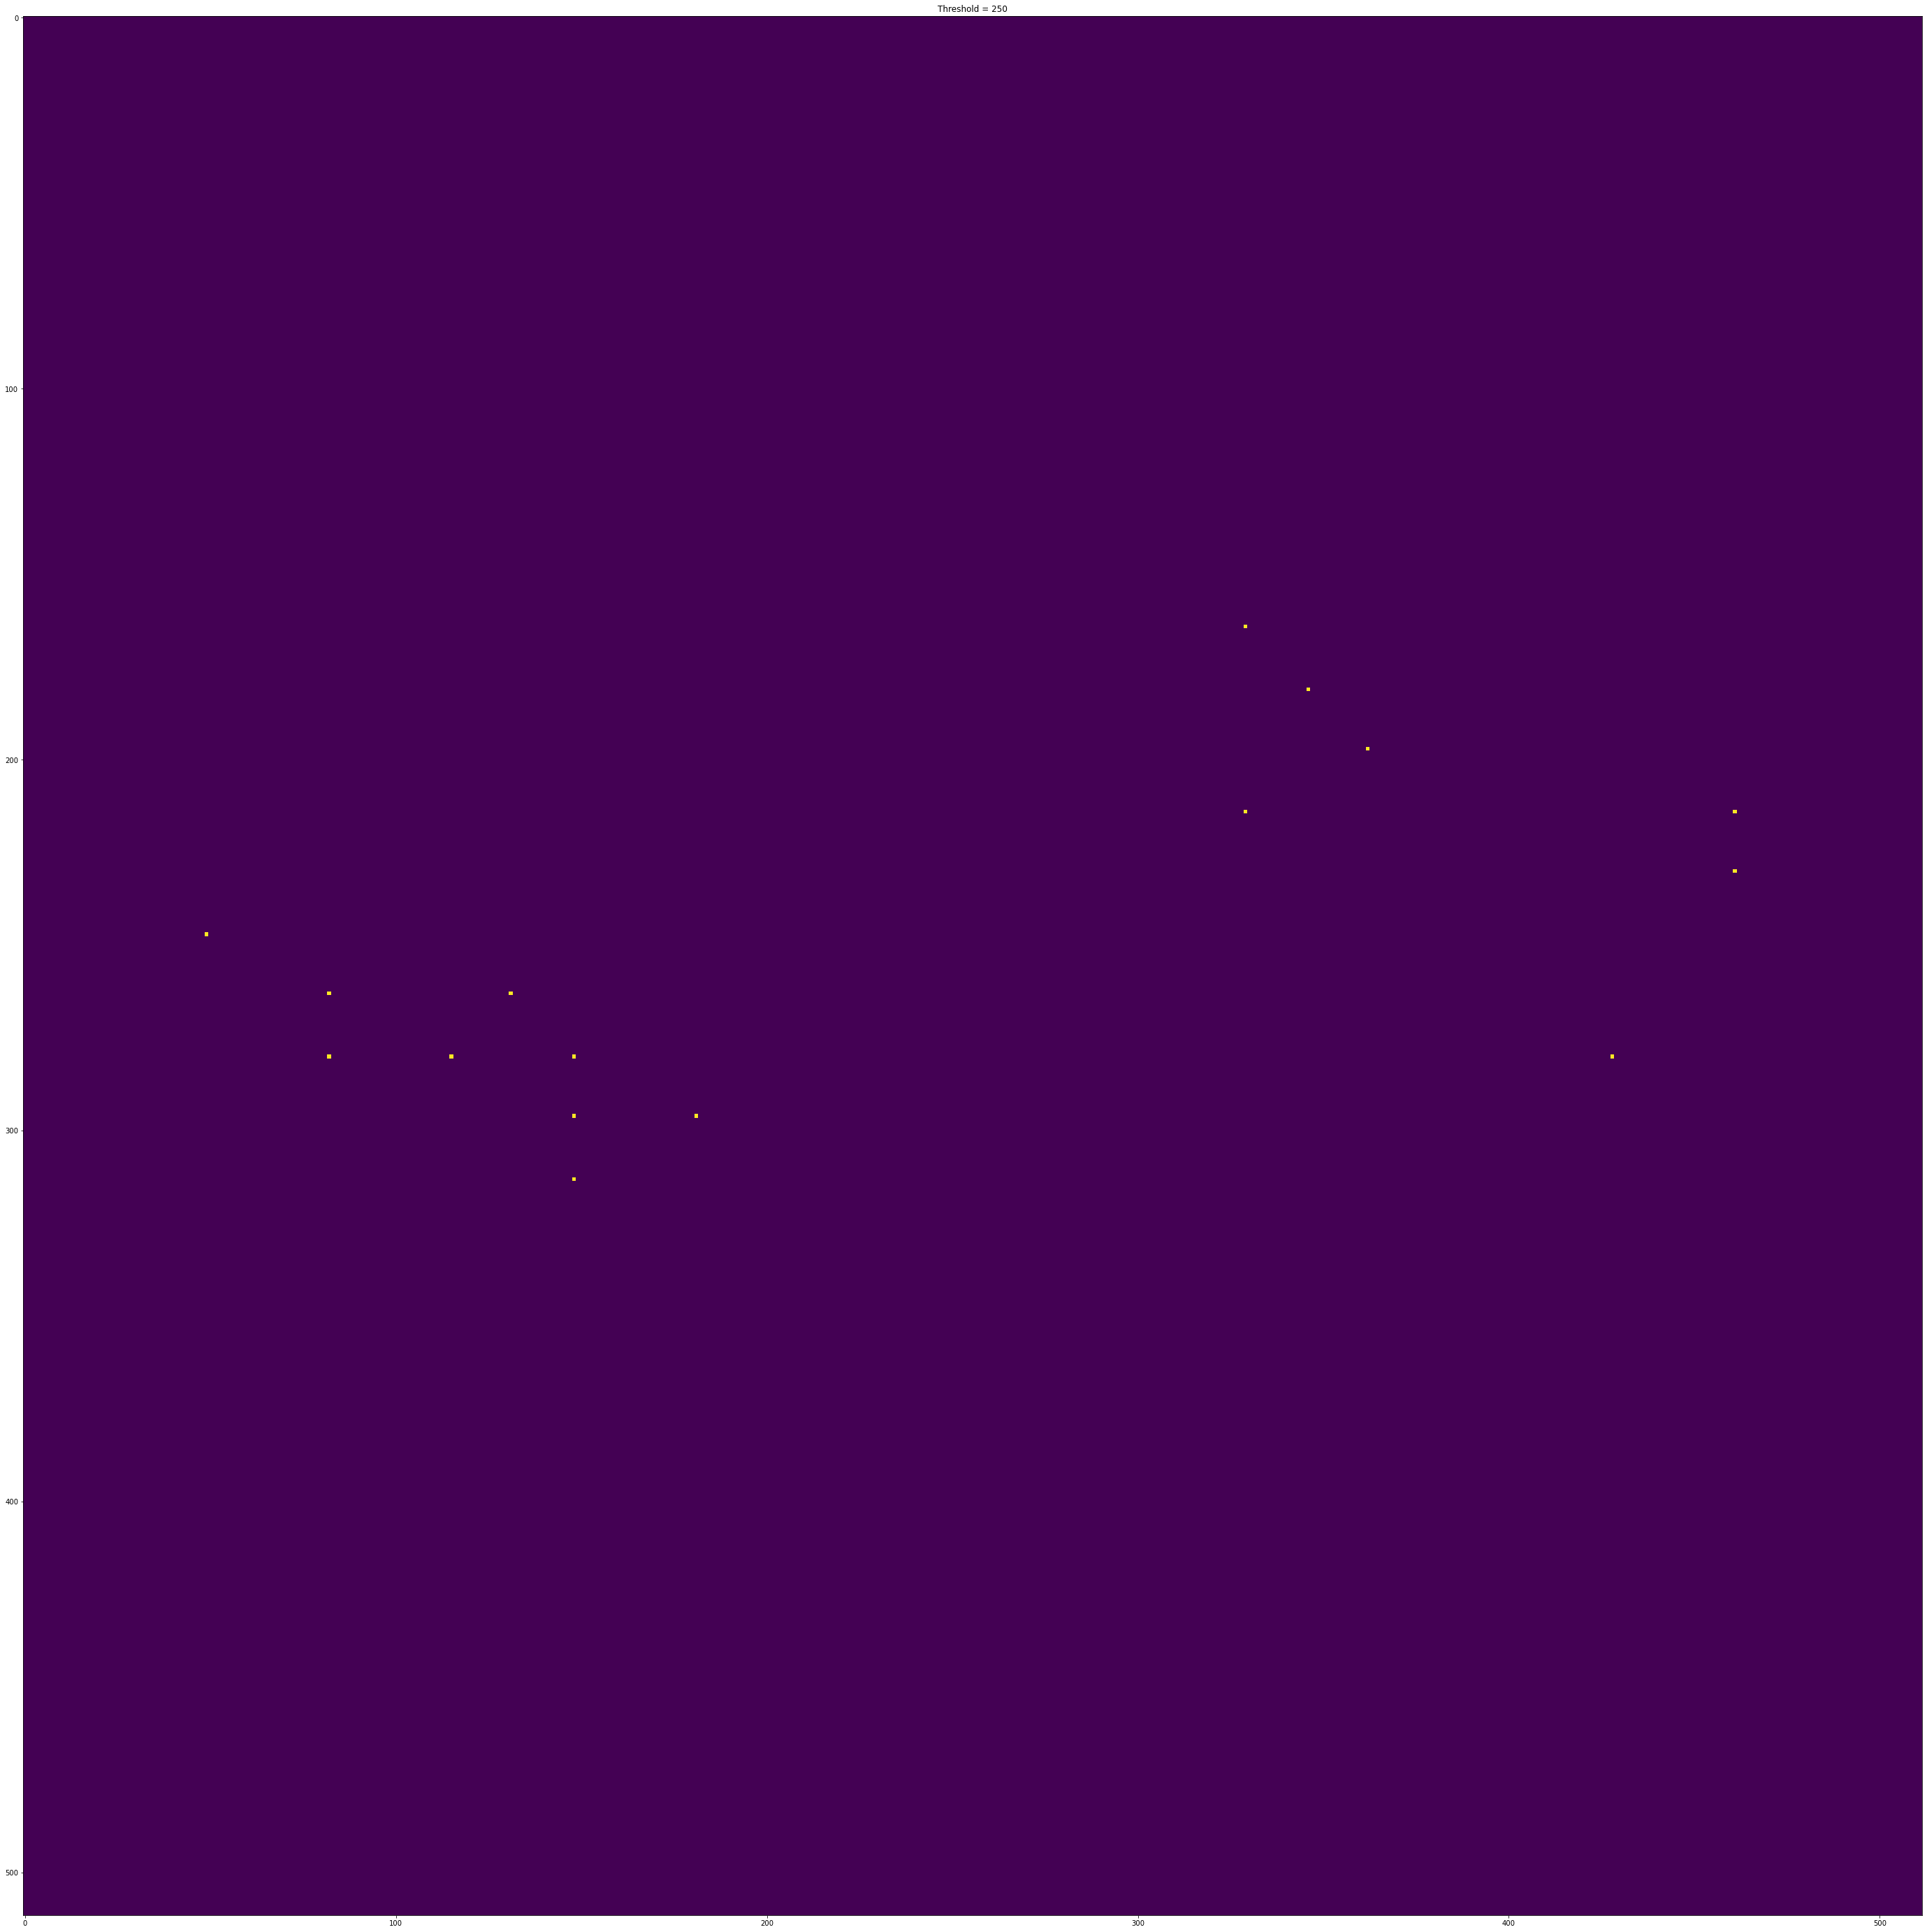

In [ ]:
def create_electrode_image(electrode_grid, pixel_image, threshold):
    electrode_image = electrode_grid * pixel_image
    electrode_image = electrode_image > threshold
    return electrode_image

for threshold in [0, 10, 50, 100, 200, 250]:
    image_elec = create_electrode_image(grid, pixel_image, threshold)
    plt.figure(figsize = (50,50))
    plt.title('Threshold = ' + str(threshold))
    plt.imshow(image_elec)

What you have so far can already be used as a phosphene vision simulator if you assume phosphenes are individual pixels. However, this assumption is not valid. A better assumption is that phosphenes are Gaussian blobs. Let's go with the second assumption. First, implement a function, which gets standard deviation as input and gives a Gaussian blob as output to be used as a phosphene filter. Then, use it to create a phosphene filter and plot it.

    def create_phosphene_filter(phosphene_size):
        temp = np.arange(-np.ceil(2 * phosphene_size), np.ceil(2 * phosphene_size) + 1)
        x, y = np.meshgrid(temp, temp)
        # phosphene_filter = ...
        return phosphene_filter

In [ ]:
# Code here

Electrode images can be transformed to phosphene images by convolving them with a phosphene filter. Implement the following function to perform this operation, test it on the electrode images and the phosphene filter that you have created, and plot the outputs.

    def create_phosphene_image(electrode_image, phosphene_filter):
        # phosphene_image = ...
        return phosphene_image

In [ ]:
# Code here

As you can see, it is not very helpful to directly use pixel images for phosphene vision. The main challenge is to find more helpful representations of pixel images and use them for phosphene vision. In the remainder of this assignment, filter pixel images with different filters and use the phosphene vision simulator that you have implemented to explore how helpful different representations of pixel images are for phosphene vision. You can use the filters in the skimage.filters module or implement your own. Test at least three filters and try to find the best parameter configuration.



In [ ]:
# Code here